#Task-04


Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv('/content/twitter_training.csv', names=col_names)
df.head()


,ID,Entity,Sentiment,Content
0,2401.0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.columns

Index(['ID', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [7]:
df

,ID,Entity,Sentiment,Content
0,2401.0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
24000,4514.0,Google,Neutral,“Android Becomes Basically Unusable If You Tur...
24001,4514.0,Google,Neutral,"""Android basically becomes useless if you turn..."
24002,4514.0,Google,Neutral,"""Android Becomes the Unusable If You Turn Off ..."
24003,4514.0,Google,Neutral,“Android Becomes Basically Illegal If You Pay ...


In [8]:
df.shape

(24005, 4)

In [9]:
df.dtypes

ID           float64
Entity        object
Sentiment     object
Content       object
dtype: object

##Preprocessed the data

In [10]:
print("Missing values before preprocessing:")
print(df.isnull().sum())

Missing values before preprocessing:
ID             2
Entity         2
Sentiment      2
Content      222
dtype: int64


In [11]:
df.dropna(inplace=True)

In [12]:
df.drop_duplicates(inplace=True)
df['Content'] = df['Content'].str.lower()

In [13]:

print("Cleaned dataset:")
print(df.head())

Cleaned dataset:
       ID       Entity Sentiment  \
0  2401.0  Borderlands  Positive   
1  2401.0  Borderlands  Positive   
2  2401.0  Borderlands  Positive   
3  2401.0  Borderlands  Positive   
4  2401.0  Borderlands  Positive   

                                             Content  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


##perform sentiment analysis

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score of each content
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to calculate sentiment for each content
df['Sentiment'] = df['Content'].apply(get_sentiment_score)

# Display the first few rows of the dataset with sentiment analysis results
print(df.head())


LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


##Aggregate Data:

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:

# Convert 'ID' column to datetime format
df['ID'] = pd.to_datetime(df['ID'])

# Map sentiment categories to numeric values
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['Sentiment_Value'] = df['Sentiment'].map(sentiment_mapping)

# Group the data by daily or weekly time period and calculate the average sentiment score
# Here, we'll aggregate sentiment scores on a daily basis
daily_sentiment = df.groupby(df['ID'].dt.date)['Sentiment_Value'].mean()

# Display the aggregated sentiment scores
print(daily_sentiment)


In [15]:
import matplotlib.pyplot as plt

# Plot sentiment trends over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-')
plt.title('Average Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'daily_sentiment' is not defined

<Figure size 1000x600 with 0 Axes>

##Visualize Sentiment Trends

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

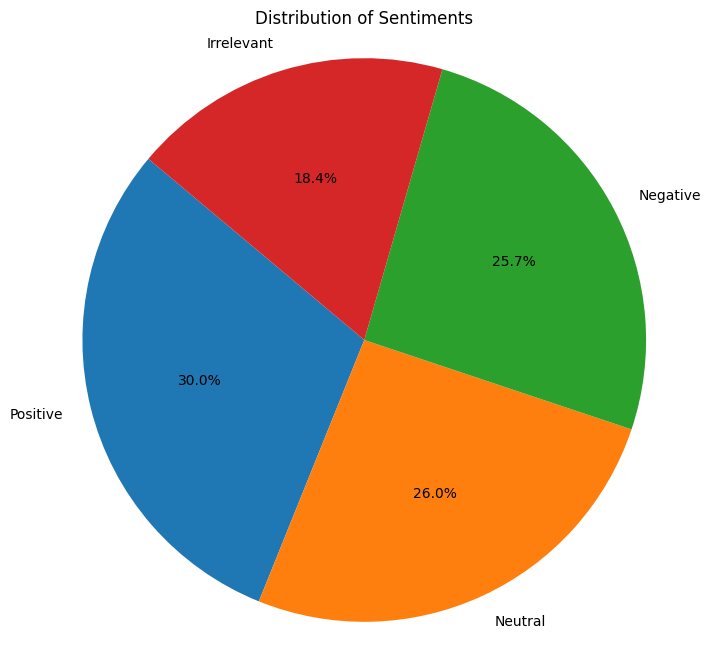

In [18]:
# Calculate the distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart 42.2
plt.show()

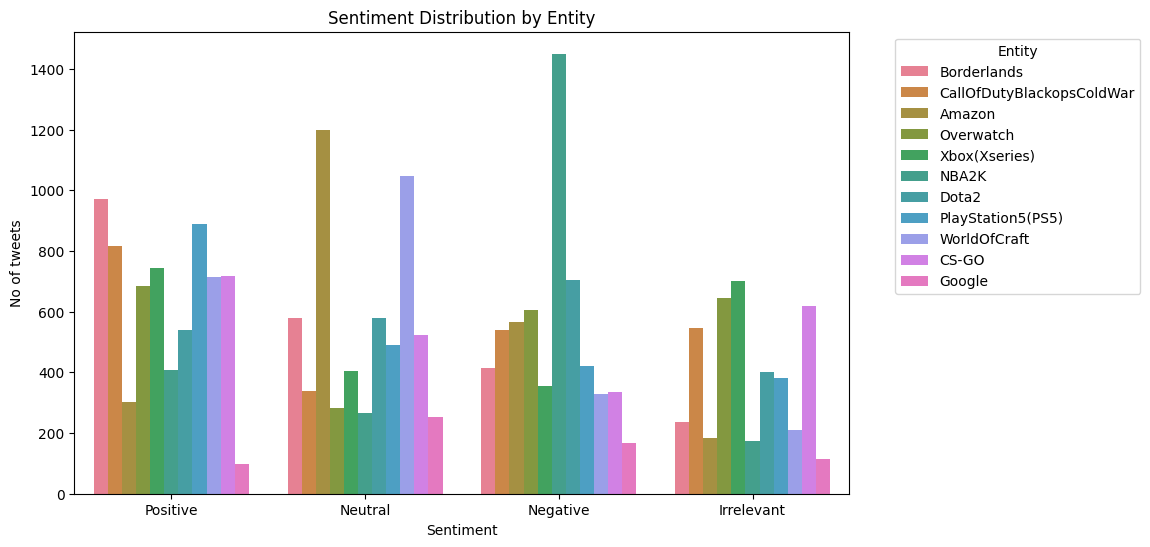

In [19]:
# Example for sentiment distribution by entity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='Entity')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("No of tweets")
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

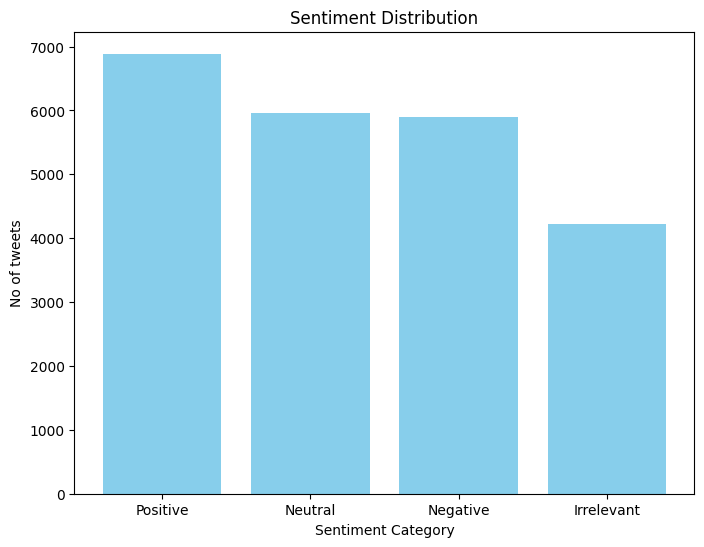

In [20]:
# lets Calculate the distribution of predicted sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Create a bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('No of tweets')

# Show the bar chart
plt.show()

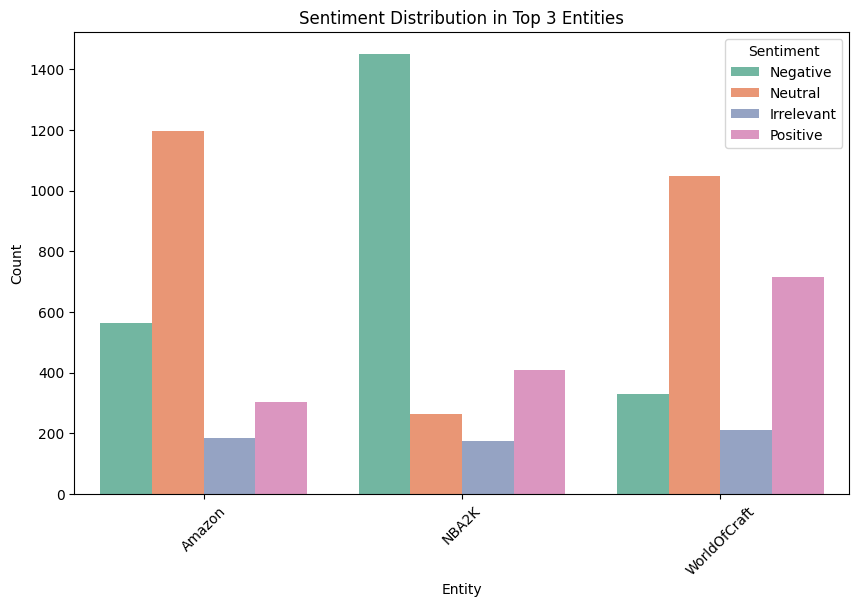

In [21]:
# Calculate the distribution of entities
entity_distribution = df['Entity'].value_counts()

# Select the top 3 entities
top_3_entities = entity_distribution.head(3).index

# Filter the DataFrame to include only the top 3 entities
df_top_3 = df[df['Entity'].isin(top_3_entities)]

# Create a grouped bar chart for sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_3, x='Entity', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution in Top 3 Entities')
plt.xlabel('Entity')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the grouped bar chart
plt.show()

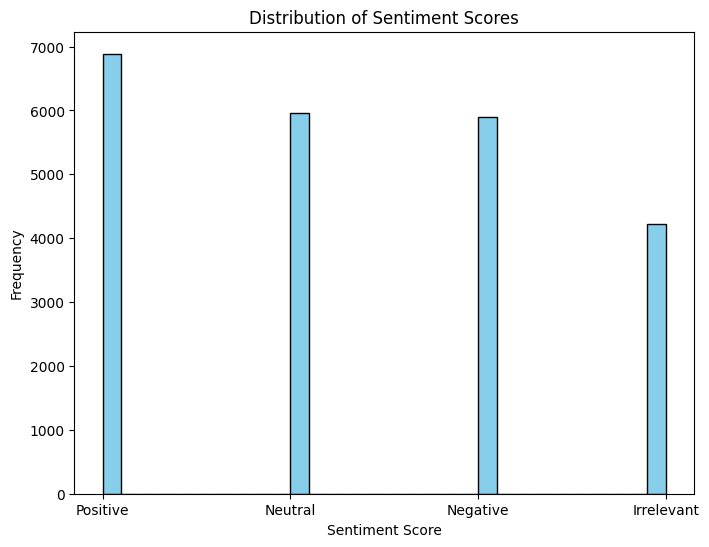

In [23]:
import matplotlib.pyplot as plt

# Create a histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the histogram
plt.show()


In [ ]:
# Get tweets with high positive sentiment
high_positive_tweets = df[df['Sentiment'] == 'Positive'].head(10)
# Plot high positive sentiment tweets
plt.figure(figsize=(10, 8))
for i, tweet in enumerate(high_positive_tweets['Content']):
    plt.text(0.5, len(high_positive_tweets) - i - 1, tweet, fontsize=10, ha='center', va='top')
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Top 10 Tweets with High Positive Sentiment')
plt.show()

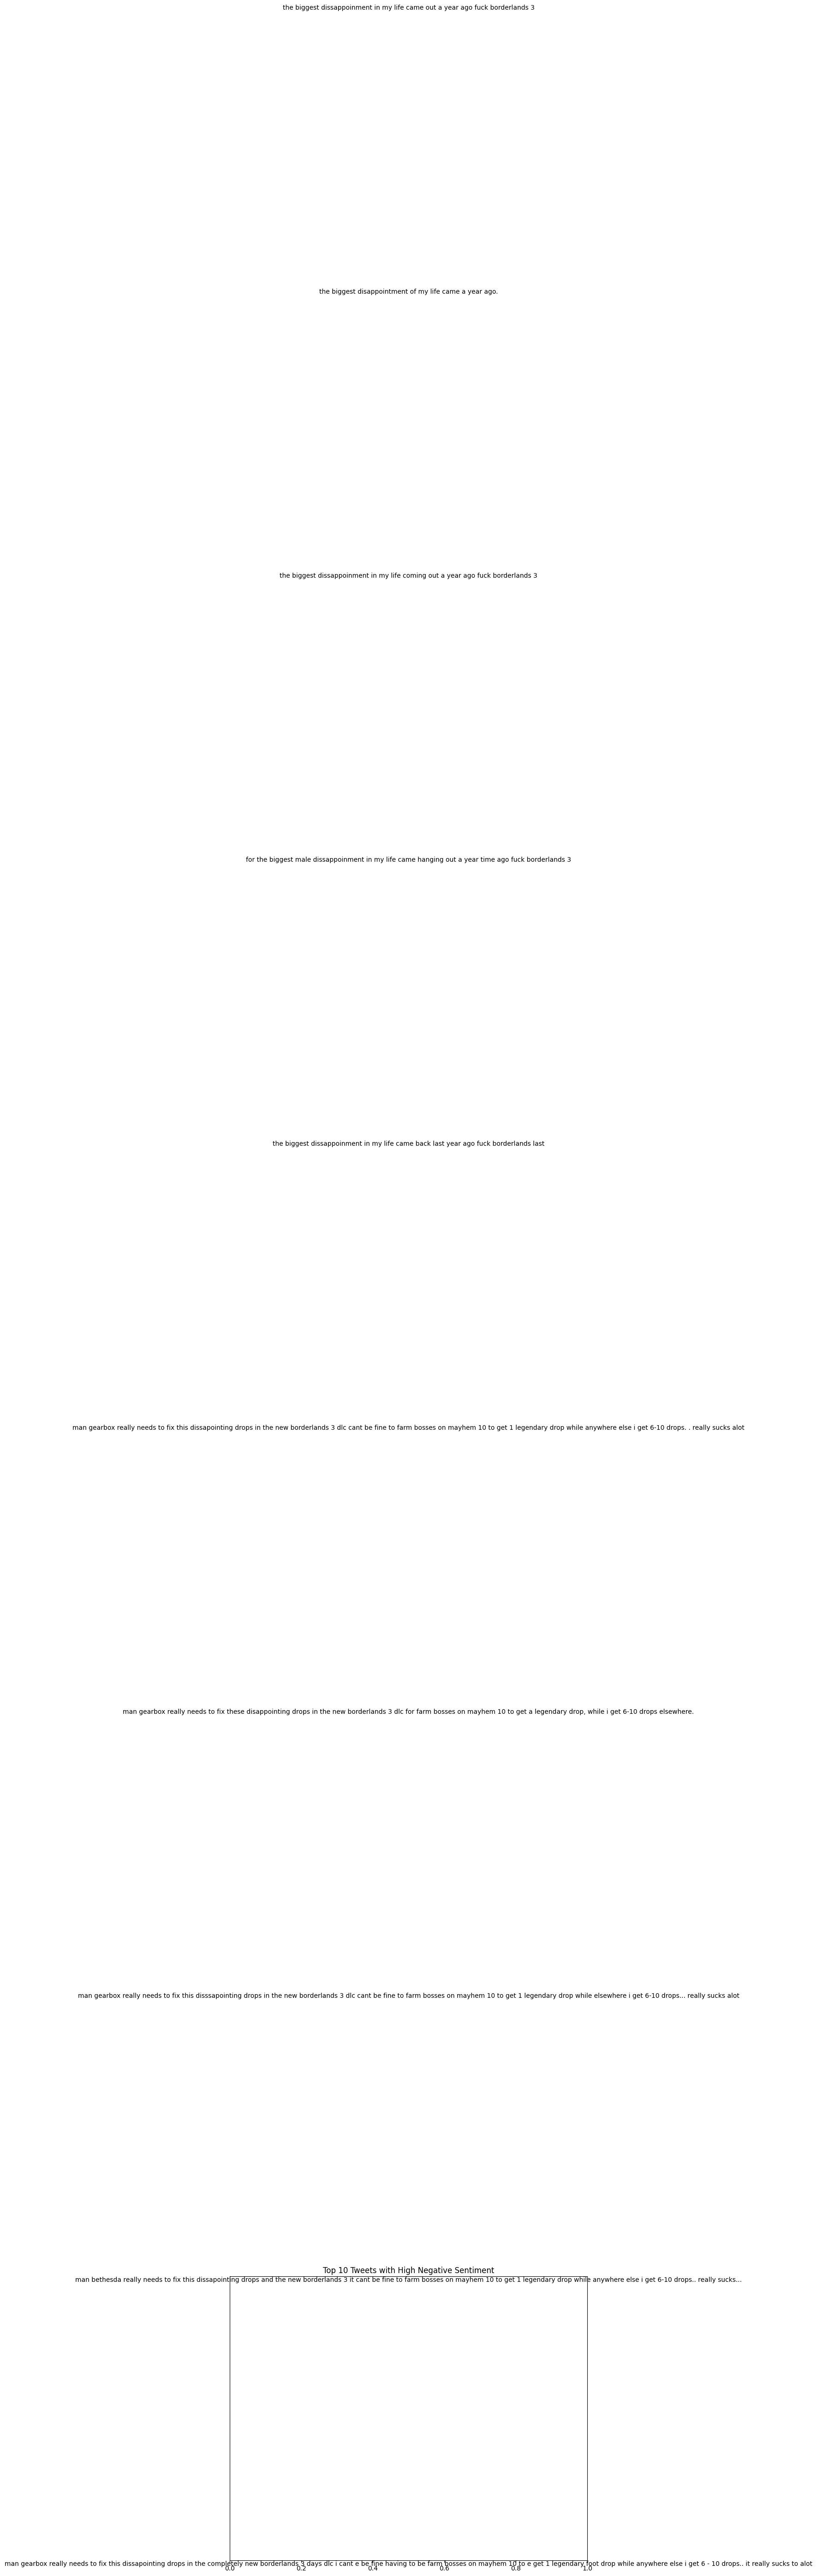

In [29]:
# Get tweets with high negative sentiment
high_negative_tweets = df[df['Sentiment'] == 'Negative'].head(10)

# Plot high negative sentiment tweets
plt.figure(figsize=(10, 8))
for i, tweet in enumerate(high_negative_tweets['Content']):
    plt.text(0.5, len(high_negative_tweets) - i - 1, tweet, fontsize=10, ha='center', va='top')
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Top 10 Tweets with High Negative Sentiment')
plt.show()
